<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Staircase_Traversal_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Staircase Traversal

You're given two positive integers representing the height of a staircase and the maximum number of steps that you can advance up the staircase at a time. Write a function that returns the number of ways in which you can climb the staircase.

For example, if you were given a staircase of `height = 3` and `maxSteps = 2` you could climb the staircase in 3 ways. You could take 1 step, 1 step, then 1 step, you could also take 1 step, then 2 steps, and you could take 2 steps, then 1 step.

Note that `maxSteps <= height` will always be true.

Sample Input

```
height = 4
maxSteps = 2
```



Sample Output

```
5
// You can climb the staircase in the following ways: 
// 1, 1, 1, 1
// 1, 1, 2
// 1, 2, 1
// 2, 1, 1
// 2, 2
```



# Solution 1: Bottom up

In [1]:
# time O(height * maxSteps)
# space O(max(height, maxSteps))

def staircaseTraversal(height, maxSteps):
  num_ways = [1]
  for current_height in range(1, height + 1):
    num_ways.append(0)
    for step in range(1, maxSteps + 1):
      previous_height = current_height - step
      if previous_height >= 0:
        num_ways[current_height] += num_ways[previous_height]
  return num_ways[height]

In [2]:
height = 4
maxSteps = 2
staircaseTraversal(height, maxSteps)

5

# Solution 2: store value only for required sliding windows

In [3]:
# time O(height * maxSteps)
# space O(min(height, maxSteps))

def staircaseTraversal(height, maxSteps):
  num_ways = [1]
  for current_height in range(1, height + 1):
    num_ways.append(0)
    for step in range(1, maxSteps + 1):
      previous_height = current_height - step
      if previous_height >= 0:
        num_ways[-1] += num_ways[-step-1]
    if len(num_ways) > maxSteps:
      num_ways.pop(0)
  return num_ways[-1]

In [4]:
height = 4
maxSteps = 2
staircaseTraversal(height, maxSteps)

5

In [5]:
height = 1
maxSteps = 5
staircaseTraversal(height, maxSteps)

1

In [6]:
height = 10
maxSteps = 5
staircaseTraversal(height, maxSteps)

464

In [7]:
height = 2
maxSteps = 5
staircaseTraversal(height, maxSteps)

2

# Solution 3: applied +/- on sliding windows 

In [8]:
# time O(height)
# space O(max(height, maxSteps))

def staircaseTraversal(height, maxSteps):
  num_ways = [1, 1]
  for current_height in range(2, height + 1):
    current_num_ways = num_ways[-1]
    start_window = current_height - maxSteps - 1
    end_window = current_height - 1
    if start_window >= 0:
      current_num_ways -= num_ways[start_window]

    current_num_ways += num_ways[end_window]
    num_ways.append(current_num_ways)

  return num_ways[height]

In [9]:
height = 4
maxSteps = 2
staircaseTraversal(height, maxSteps)

5

In [10]:
height = 10
maxSteps = 5
staircaseTraversal(height, maxSteps)

464

In [11]:
height = 1
maxSteps = 5
staircaseTraversal(height, maxSteps)

1

In [12]:
height = 2
maxSteps = 5
staircaseTraversal(height, maxSteps)

2

# Conceptual Note

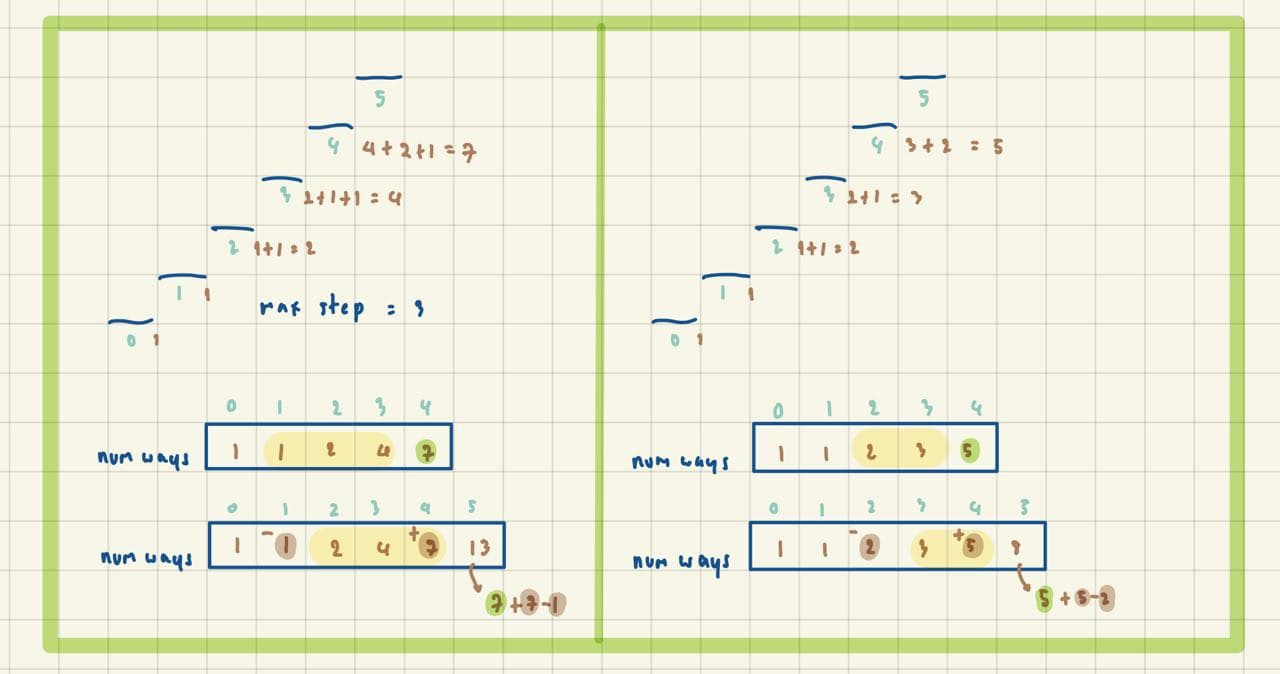